### CIFAR-10
---

The CIFAR-10 dataset consists of 60000 32$\times$32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. This dataset is also used very commonly for benchmarking model performace.

It is more complex than the MNIST dataset, since it consist of 3 channel RGB images as opposed to simple grayscale images. Using a vanilla neural network/multilayer perceptron gives subpar performace because of this. We usually use a Convolutional Neural Network for image datasets, which will be covered later in the course.


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape)
print(test_images.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


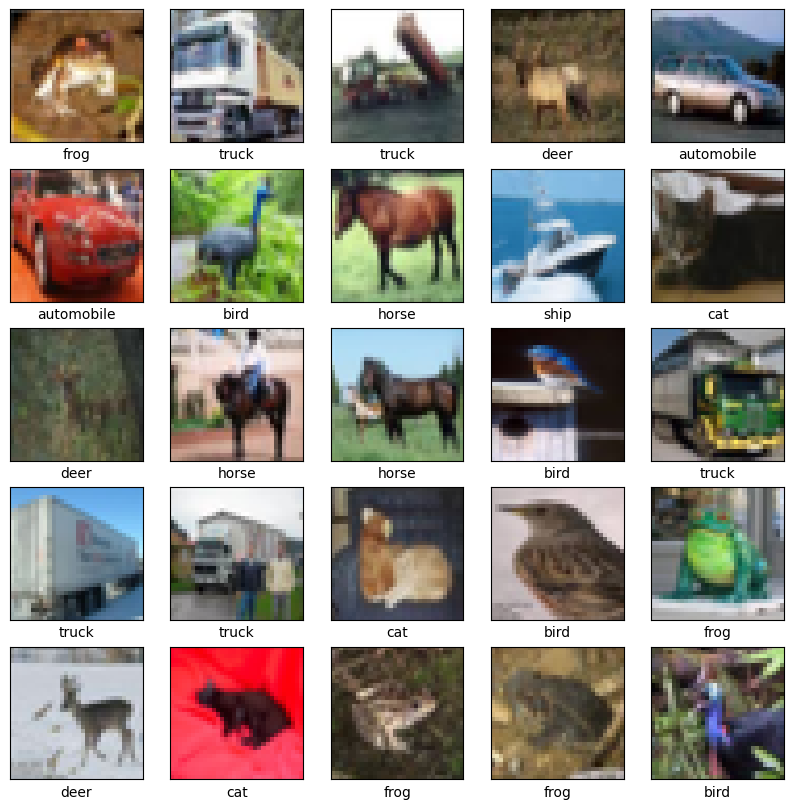

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Dropout
---

Since this is a complex dataset, we'd like to use a deeper neural network with more hidden layers. However, that would also likely result in overfitting. To counter this, we can use a regularization method called dropout.

 - In a standard neural network, the derivative received by each parameter tells it how it should change so the final loss function is reduced, given what all other units are doing.

 - Therefore, units may change in a way that they fix up the mistakes of the other units. This may lead to complex co-adaptations.

 - This in turn leads to overfitting because these co-adaptations do not generalize to unseen data.

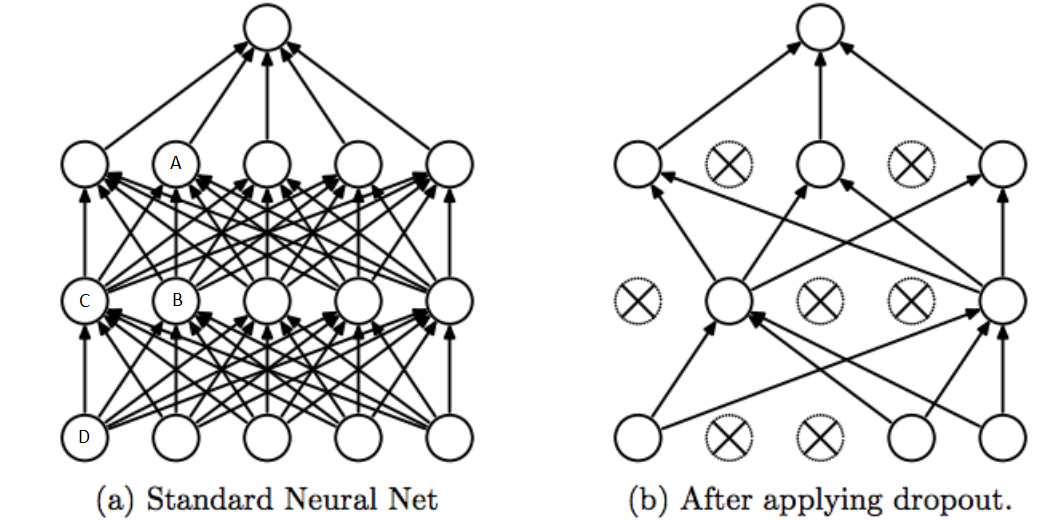

Dropout prevents co-adaptation by making the presence of other hidden units unreliable. Therefore, a hidden unit cannot rely on other specific units to correct its mistakes. It must perform well in a wide variety of different contexts provided by the other hidden units.

One caveat is that dropout slows down the training process.

### Dropout in TensorFlow
---

In [ ]:
model_without_dropout = models.Sequential()
model_without_dropout.add(layers.Flatten())
model_without_dropout.add(layers.Dense(1024, activation='relu'))
model_without_dropout.add(layers.Dense(1024, activation='relu'))
model_without_dropout.add(layers.Dense(1024, activation='relu'))
model_without_dropout.add(layers.Dense(1024, activation='relu'))
model_without_dropout.add(layers.Dense(10, activation='softmax'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_without_dropout.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_without_dropout = model_without_dropout.fit(train_images, train_labels, epochs=50, batch_size=256,
                    validation_data=(test_images, test_labels))

Epoch 1/50
196/196 [==============================] - 8s 10ms/step - loss: 1.9394 - accuracy: 0.2937 - val_loss: 1.7824 - val_accuracy: 0.3662
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6902 - accuracy: 0.3897 - val_loss: 1.6284 - val_accuracy: 0.4194
Epoch 3/50
196/196 [==============================] - 1s 7ms/step - loss: 1.5981 - accuracy: 0.4277 - val_loss: 1.5361 - val_accuracy: 0.4555
Epoch 4/50
196/196 [==============================] - 1s 7ms/step - loss: 1.5294 - accuracy: 0.4534 - val_loss: 1.5242 - val_accuracy: 0.4593
Epoch 5/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4859 - accuracy: 0.4685 - val_loss: 1.5039 - val_accuracy: 0.4650
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4303 - accuracy: 0.4867 - val_loss: 1.4569 - val_accuracy: 0.4813
Epoch 7/50
196/196 [==============================] - 1s 7ms/step - loss: 1.3911 - accuracy: 0.5034 - val_loss: 1.4532 - val_accuracy: 0.4772
Epoch

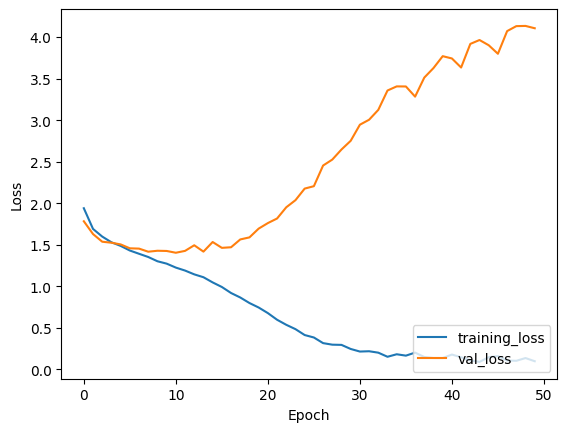

In [ ]:
plt.plot(history_without_dropout.history['loss'], label='training_loss')
plt.plot(history_without_dropout.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

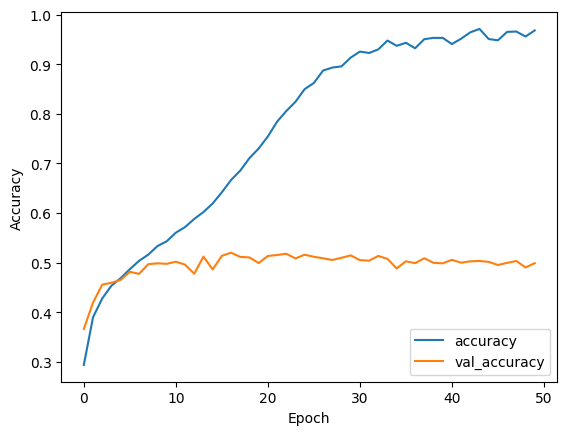

In [ ]:
plt.plot(history_without_dropout.history['accuracy'], label='accuracy')
plt.plot(history_without_dropout.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model_without_dropout.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 4.1062 - accuracy: 0.4988 - 682ms/epoch - 2ms/step


In [ ]:
model_dropout = models.Sequential()
model_dropout.add(layers.Flatten())
model_dropout.add(layers.Dense(1024, activation='relu'))
model_dropout.add(layers.Dense(1024, activation='relu'))
model_dropout.add(layers.Dropout(0.3))
model_dropout.add(layers.Dense(1024, activation='relu'))
model_dropout.add(layers.Dropout(0.3))
model_dropout.add(layers.Dense(1024, activation='relu'))
model_dropout.add(layers.Dropout(0.3))
model_dropout.add(layers.Dense(10, activation='softmax'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_dropout.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_dropout = model_dropout.fit(train_images, train_labels, epochs=50, batch_size=256,
                    validation_data=(test_images, test_labels))

Epoch 1/50
196/196 [==============================] - 4s 10ms/step - loss: 1.9818 - accuracy: 0.2740 - val_loss: 1.8628 - val_accuracy: 0.3259
Epoch 2/50
196/196 [==============================] - 1s 7ms/step - loss: 1.7498 - accuracy: 0.3680 - val_loss: 1.6482 - val_accuracy: 0.4040
Epoch 3/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6646 - accuracy: 0.4045 - val_loss: 1.5737 - val_accuracy: 0.4377
Epoch 4/50
196/196 [==============================] - 1s 7ms/step - loss: 1.5938 - accuracy: 0.4307 - val_loss: 1.5838 - val_accuracy: 0.4391
Epoch 5/50
196/196 [==============================] - 1s 7ms/step - loss: 1.5497 - accuracy: 0.4473 - val_loss: 1.5332 - val_accuracy: 0.4542
Epoch 6/50
196/196 [==============================] - 1s 7ms/step - loss: 1.5136 - accuracy: 0.4566 - val_loss: 1.4739 - val_accuracy: 0.4768
Epoch 7/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4795 - accuracy: 0.4726 - val_loss: 1.4588 - val_accuracy: 0.4797
Epoch

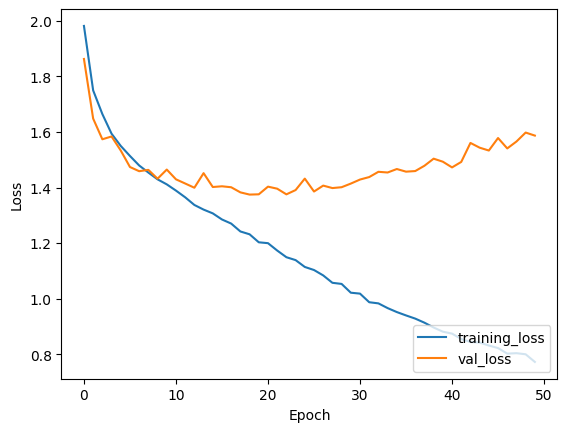

In [ ]:
plt.plot(history_dropout.history['loss'], label='training_loss')
plt.plot(history_dropout.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

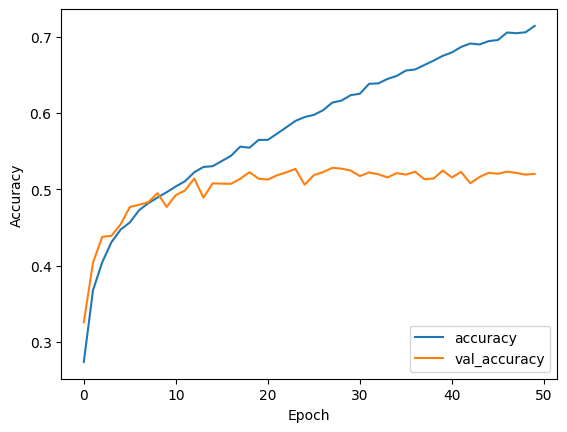

In [ ]:
plt.plot(history_dropout.history['accuracy'], label='accuracy')
plt.plot(history_dropout.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model_dropout.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.5870 - accuracy: 0.5202 - 1s/epoch - 4ms/step


### Batch Normalization
---

Internal covariate shift refers to covariate shift occurring within a neural network, i.e. going from (say) layer 2 to layer 3. This happens because, as the network learns and the weights are updated, the distribution of outputs of a specific layer in the network changes. This forces the higher layers to adapt to that drift, which slows down learning.

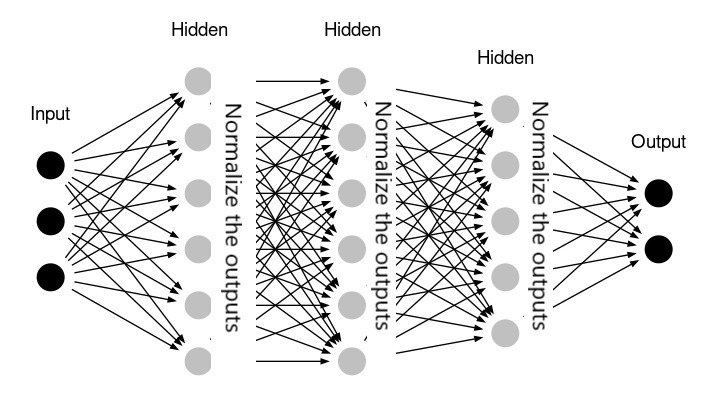

Batch normalization is a technique for training neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. Batch normalization also acts as a regularizer.

## Batch Normalization in TensorFlow
---

In [ ]:
model_without_batchnorm = models.Sequential()
model_without_batchnorm.add(layers.Flatten())
model_without_batchnorm.add(layers.Dense(128, activation='relu'))
model_without_batchnorm.add(layers.Dense(128, activation='relu'))
model_without_batchnorm.add(layers.Dense(10, activation='softmax'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_without_batchnorm.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_without_batchnorm = model_without_batchnorm.fit(train_images, train_labels, epochs=50, batch_size=256,
                    validation_data=(test_images, test_labels))

Epoch 1/50
196/196 [==============================] - 3s 7ms/step - loss: 2.3835 - accuracy: 0.2486 - val_loss: 1.8908 - val_accuracy: 0.2994
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8720 - accuracy: 0.3161 - val_loss: 1.8263 - val_accuracy: 0.3388
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8437 - accuracy: 0.3261 - val_loss: 1.8496 - val_accuracy: 0.3263
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8156 - accuracy: 0.3362 - val_loss: 1.8124 - val_accuracy: 0.3319
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8155 - accuracy: 0.3387 - val_loss: 2.0440 - val_accuracy: 0.2682
Epoch 6/50
196/196 [==============================] - 1s 7ms/step - loss: 1.8080 - accuracy: 0.3412 - val_loss: 1.8387 - val_accuracy: 0.3330
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8092 - accuracy: 0.3390 - val_loss: 1.7883 - val_accuracy: 0.3432
Epoch 

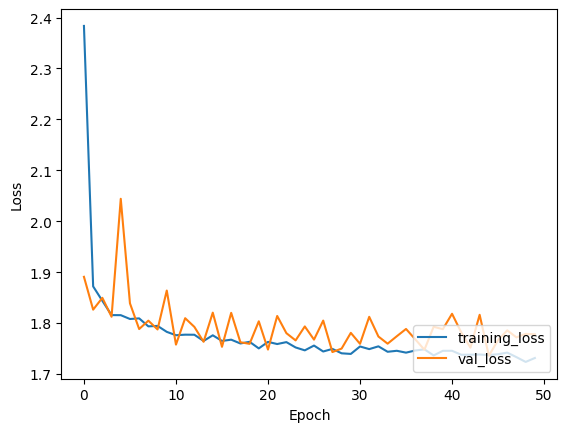

In [ ]:
plt.plot(history_without_batchnorm.history['loss'], label='training_loss')
plt.plot(history_without_batchnorm.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

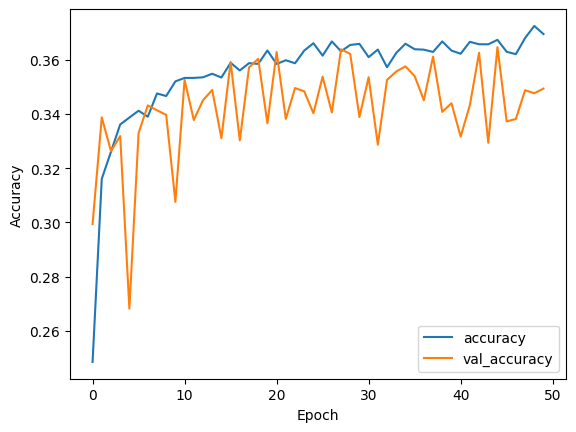

In [ ]:
plt.plot(history_without_batchnorm.history['accuracy'], label='accuracy')
plt.plot(history_without_batchnorm.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model_without_batchnorm.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.7779 - accuracy: 0.3494 - 611ms/epoch - 2ms/step


In [ ]:
model_batchnorm = models.Sequential()
model_batchnorm.add(layers.Flatten())
model_batchnorm.add(layers.Dense(128, activation='relu'))
model_batchnorm.add(layers.BatchNormalization())
model_batchnorm.add(layers.Dense(128, activation='relu'))
model_batchnorm.add(layers.BatchNormalization())
model_batchnorm.add(layers.Dense(10, activation='softmax'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_batchnorm.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_batchnorm = model_batchnorm.fit(train_images, train_labels, epochs=50, batch_size=256,
                    validation_data=(test_images, test_labels))

Epoch 1/50
196/196 [==============================] - 4s 9ms/step - loss: 1.7606 - accuracy: 0.3731 - val_loss: 2.1957 - val_accuracy: 0.3015
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.5627 - accuracy: 0.4432 - val_loss: 1.8262 - val_accuracy: 0.3710
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.4770 - accuracy: 0.4759 - val_loss: 1.9489 - val_accuracy: 0.3575
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.4269 - accuracy: 0.4935 - val_loss: 1.7035 - val_accuracy: 0.3971
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.3839 - accuracy: 0.5089 - val_loss: 1.8304 - val_accuracy: 0.3960
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.3588 - accuracy: 0.5174 - val_loss: 1.7041 - val_accuracy: 0.4357
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.3234 - accuracy: 0.5302 - val_loss: 1.6159 - val_accuracy: 0.4489
Epoch 

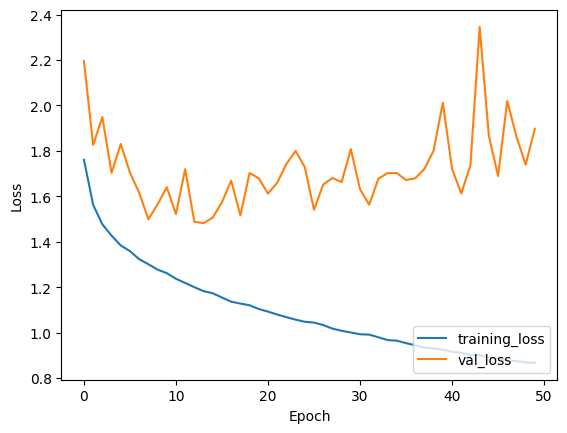

In [ ]:
plt.plot(history_batchnorm.history['loss'], label='training_loss')
plt.plot(history_batchnorm.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

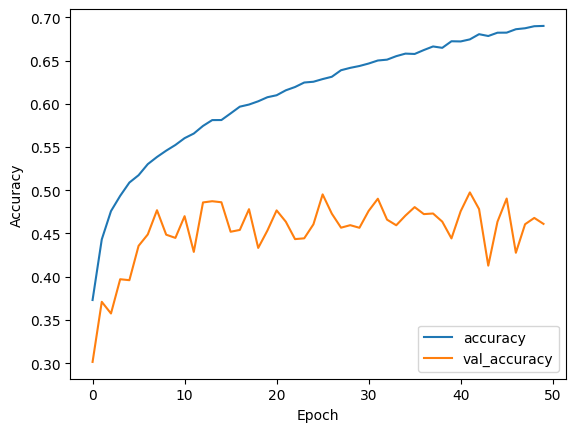

In [ ]:
plt.plot(history_batchnorm.history['accuracy'], label='accuracy')
plt.plot(history_batchnorm.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model_batchnorm.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.8977 - accuracy: 0.4611 - 627ms/epoch - 2ms/step


## Dropout in PyTorch
---

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=500, shuffle=False)

100%|██████████| 170498071/170498071 [00:04<00:00, 35033245.16it/s]


Extracting data/cifar-10-python.tar.gz to data/


In [ ]:
class MultilayerPerceptron(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, output_size)
        #self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = F.relu(self.fc4(X))
        X = self.fc5(X)

        return F.log_softmax(X, dim=1)

In [ ]:
model = MultilayerPerceptron().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 50

train_losses = []
test_losses = []
train_accs = []
test_accs  = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0

    for X_train, y_train in train_loader:

      X_train, y_train = X_train.to(device), y_train.to(device)

      y_pred = model(X_train.view(100, -1))
      loss = criterion(y_pred, y_train)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    accuracy = trn_corr.item()*100 / (len(train_dataset))

    train_losses.append(loss)
    train_accs.append(accuracy)


    with torch.no_grad():

      for X_test, y_test in test_loader:

        X_test, y_test = X_test.to(device), y_test.to(device)

        y_val = model(X_test.view(500, -1))

        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

    test_accuracy = tst_corr.item()*100 / (len(test_dataset))

    val_loss = criterion(y_val,y_test)
    test_losses.append(val_loss)
    test_accs.append(test_accuracy)
    print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')

epoch: 0 training loss:1.838758111000061 training accuracy:27.772 val loss:1.763780951499939 val accuracy:34.79
epoch: 1 training loss:1.6146173477172852 training accuracy:36.216 val loss:1.7136460542678833 val accuracy:36.41
epoch: 2 training loss:1.3396623134613037 training accuracy:39.83 val loss:1.639967441558838 val accuracy:41.5
epoch: 3 training loss:1.3273082971572876 training accuracy:42.202 val loss:1.6033607721328735 val accuracy:43.75
epoch: 4 training loss:1.4082708358764648 training accuracy:44.252 val loss:1.5709726810455322 val accuracy:46.07
epoch: 5 training loss:1.4996178150177002 training accuracy:46.046 val loss:1.5337752103805542 val accuracy:46.21
epoch: 6 training loss:1.3350193500518799 training accuracy:47.796 val loss:1.5607032775878906 val accuracy:47.07
epoch: 7 training loss:1.3355247974395752 training accuracy:48.704 val loss:1.4837859869003296 val accuracy:48.14
epoch: 8 training loss:1.2142778635025024 training accuracy:50.062 val loss:1.493980884552002

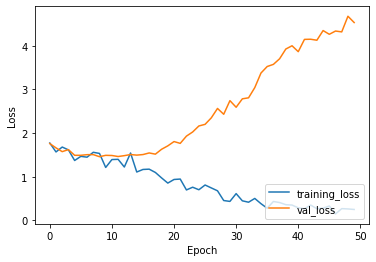

In [ ]:
train_losses = [x.cpu().detach().numpy() for x in train_losses]
test_losses = [x.cpu().detach().numpy()  for x in test_losses]

plt.plot(train_losses, label='training_loss')
plt.plot(test_losses, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

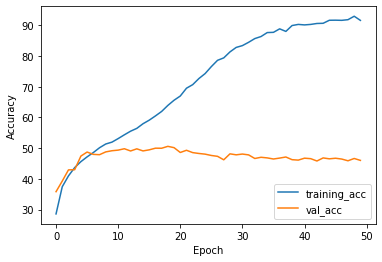

In [ ]:
plt.plot(train_accs, label='training_acc')
plt.plot(test_accs, label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
class MultilayerPerceptronDropout(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.dropout1 = nn.Dropout(p=0.3)
        self.fc3 = nn.Linear(1024, 1024)
        self.dropout2 = nn.Dropout(p=0.3)
        self.fc4 = nn.Linear(1024, 1024)
        self.dropout3 = nn.Dropout(p=0.3)
        self.fc5 = nn.Linear(1024, output_size)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.dropout1(X)
        X = F.relu(self.fc3(X))
        X = self.dropout2(X)
        X = F.relu(self.fc4(X))
        X = self.dropout3(X)
        X = self.fc5(X)

        return F.log_softmax(X, dim=1)

In [ ]:
model = MultilayerPerceptronDropout().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 75

train_losses = []
test_losses = []
train_accs = []
test_accs  = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0

    for X_train, y_train in train_loader:

      X_train, y_train = X_train.to(device), y_train.to(device)

      y_pred = model(X_train.view(100, -1))
      loss = criterion(y_pred, y_train)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    accuracy = trn_corr.item()*100 / (len(train_dataset))

    train_losses.append(loss)
    train_accs.append(accuracy)


    with torch.no_grad():

      for X_test, y_test in test_loader:

        X_test, y_test = X_test.to(device), y_test.to(device)

        y_val = model(X_test.view(500, -1))

        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

    test_accuracy = tst_corr.item()*100 / (len(test_dataset))

    val_loss = criterion(y_val,y_test)
    test_losses.append(val_loss)
    test_accs.append(test_accuracy)
    print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')

epoch: 0 training loss:1.740533709526062 training accuracy:28.688 val loss:1.754112958908081 val accuracy:35.63
epoch: 1 training loss:1.5671952962875366 training accuracy:35.68 val loss:1.7381995916366577 val accuracy:37.24
epoch: 2 training loss:1.6430696249008179 training accuracy:38.92 val loss:1.6054128408432007 val accuracy:41.13
epoch: 3 training loss:1.725111961364746 training accuracy:41.154 val loss:1.6352345943450928 val accuracy:41.76
epoch: 4 training loss:1.7271915674209595 training accuracy:42.542 val loss:1.6325401067733765 val accuracy:42.71
epoch: 5 training loss:1.5589178800582886 training accuracy:43.778 val loss:1.6542459726333618 val accuracy:44.12
epoch: 6 training loss:1.4721806049346924 training accuracy:44.696 val loss:1.641357660293579 val accuracy:44.05
epoch: 7 training loss:1.3322290182113647 training accuracy:45.222 val loss:1.5343585014343262 val accuracy:45.66
epoch: 8 training loss:1.4926466941833496 training accuracy:45.984 val loss:1.5644428730010986

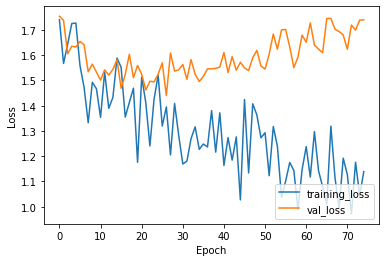

In [ ]:
train_losses = [x.cpu().detach().numpy() for x in train_losses]
test_losses = [x.cpu().detach().numpy()  for x in test_losses]

plt.plot(train_losses, label='training_loss')
plt.plot(test_losses, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

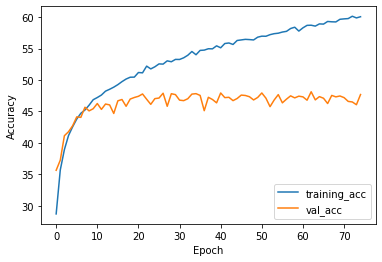

In [ ]:
plt.plot(train_accs, label='training_acc')
plt.plot(test_accs, label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Batch Normalization in PyTorch
---

In [ ]:
class MultilayerPerceptronWithoutBatchNorm(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, output_size)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)

In [ ]:
model = MultilayerPerceptronWithoutBatchNorm().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 50

train_losses = []
test_losses = []
train_accs = []
test_accs  = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0

    for X_train, y_train in train_loader:

      X_train, y_train = X_train.to(device), y_train.to(device)

      y_pred = model(X_train.view(100, -1))
      loss = criterion(y_pred, y_train)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    accuracy = trn_corr.item()*100 / (len(train_dataset))

    train_losses.append(loss)
    train_accs.append(accuracy)


    with torch.no_grad():

      for X_test, y_test in test_loader:

        X_test, y_test = X_test.to(device), y_test.to(device)

        y_val = model(X_test.view(500, -1))

        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

    test_accuracy = tst_corr.item()*100 / (len(test_dataset))

    val_loss = criterion(y_val,y_test)
    test_losses.append(val_loss)
    test_accs.append(test_accuracy)
    print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')

epoch: 0 training loss:2.015148878097534 training accuracy:27.312 val loss:1.8696138858795166 val accuracy:30.73
epoch: 1 training loss:2.040102958679199 training accuracy:31.708 val loss:1.7726038694381714 val accuracy:33.6
epoch: 2 training loss:1.7016782760620117 training accuracy:32.392 val loss:1.7630199193954468 val accuracy:34.19
epoch: 3 training loss:1.699514627456665 training accuracy:33.46 val loss:1.8422694206237793 val accuracy:29.85
epoch: 4 training loss:1.6939291954040527 training accuracy:33.104 val loss:1.7729157209396362 val accuracy:33.52
epoch: 5 training loss:1.766359567642212 training accuracy:33.33 val loss:1.746293067932129 val accuracy:33.81
epoch: 6 training loss:1.90187668800354 training accuracy:33.882 val loss:1.8347790241241455 val accuracy:32.89
epoch: 7 training loss:1.8420947790145874 training accuracy:34.114 val loss:1.8053994178771973 val accuracy:32.11
epoch: 8 training loss:1.8639332056045532 training accuracy:33.748 val loss:1.82020902633667 val a

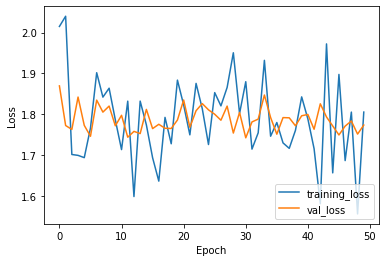

In [ ]:
train_losses = [x.cpu().detach().numpy() for x in train_losses]
test_losses = [x.cpu().detach().numpy()  for x in test_losses]

plt.plot(train_losses, label='training_loss')
plt.plot(test_losses, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

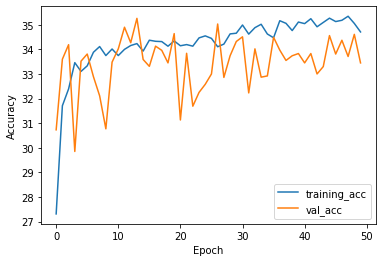

In [ ]:
plt.plot(train_accs, label='training_acc')
plt.plot(test_accs, label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
class MultilayerPerceptronWithBatchNorm(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 128)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, output_size)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.batchnorm1(X)
        X = F.relu(self.fc2(X))
        X = self.batchnorm2(X)
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)

In [ ]:
model = MultilayerPerceptronWithBatchNorm().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 50

train_losses = []
test_losses = []
train_accs = []
test_accs  = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0

    for X_train, y_train in train_loader:

      X_train, y_train = X_train.to(device), y_train.to(device)

      y_pred = model(X_train.view(100, -1))
      loss = criterion(y_pred, y_train)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    accuracy = trn_corr.item()*100 / (len(train_dataset))

    train_losses.append(loss)
    train_accs.append(accuracy)


    with torch.no_grad():

      for X_test, y_test in test_loader:

        X_test, y_test = X_test.to(device), y_test.to(device)

        y_val = model(X_test.view(500, -1))

        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

    test_accuracy = tst_corr.item()*100 / (len(test_dataset))

    val_loss = criterion(y_val,y_test)
    test_losses.append(val_loss)
    test_accs.append(test_accuracy)
    print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')

epoch: 0 training loss:1.6192013025283813 training accuracy:36.878 val loss:1.6207784414291382 val accuracy:41.93
epoch: 1 training loss:1.5863769054412842 training accuracy:43.606 val loss:1.5334274768829346 val accuracy:46.38
epoch: 2 training loss:1.5974953174591064 training accuracy:45.636 val loss:1.4978371858596802 val accuracy:47.23
epoch: 3 training loss:1.7459110021591187 training accuracy:47.512 val loss:1.4694057703018188 val accuracy:47.74
epoch: 4 training loss:1.4338562488555908 training accuracy:48.808 val loss:1.4439972639083862 val accuracy:49.04
epoch: 5 training loss:1.690130352973938 training accuracy:49.916 val loss:1.4484072923660278 val accuracy:49.7
epoch: 6 training loss:1.4451860189437866 training accuracy:50.83 val loss:1.4716681241989136 val accuracy:48.98
epoch: 7 training loss:1.5495269298553467 training accuracy:51.846 val loss:1.400763988494873 val accuracy:50.41
epoch: 8 training loss:1.2688652276992798 training accuracy:52.298 val loss:1.43719327449798

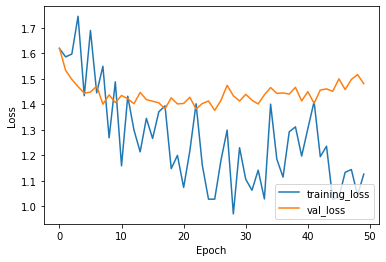

In [ ]:
train_losses = [x.cpu().detach().numpy() for x in train_losses]
test_losses = [x.cpu().detach().numpy()  for x in test_losses]

plt.plot(train_losses, label='training_loss')
plt.plot(test_losses, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

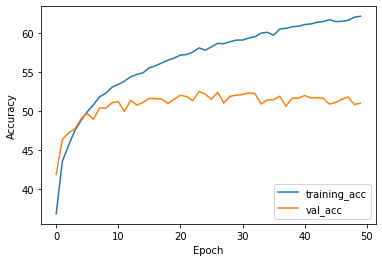

In [ ]:
plt.plot(train_accs, label='training_acc')
plt.plot(test_accs, label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


# Learning Rate Scheduling
___


## TENSORFLOW

Loading Data

In [ ]:
import tensorflow as tf
import tensorflow

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0


Creating the NN model


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model():
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation = 'softmax'))
  return model

Defining some functions to plot LR trend and metrics.

In [ ]:
import matplotlib.pyplot as plt

def plot_lr(history_):
    learning_rate = history_.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(['train_'+metric, 'val_'+metric])
    plt.show()

### Constant Learning Rate

___

In [ ]:
model = create_model()
initial_learning_rate = 0.01
opt = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

model.compile(
    optimizer=opt,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history_constant = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_test, y_test)
)


Epoch 1/50
196/196 [==============================] - 4s 10ms/step - loss: 3.2905 - accuracy: 0.2444 - val_loss: 1.8473 - val_accuracy: 0.3116
Epoch 2/50
196/196 [==============================] - 1s 7ms/step - loss: 1.8105 - accuracy: 0.3349 - val_loss: 1.7972 - val_accuracy: 0.3480
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7392 - accuracy: 0.3708 - val_loss: 1.8428 - val_accuracy: 0.3410
Epoch 4/50
196/196 [==============================] - 1s 7ms/step - loss: 1.7006 - accuracy: 0.3837 - val_loss: 1.7371 - val_accuracy: 0.3747
Epoch 5/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6645 - accuracy: 0.4016 - val_loss: 1.6736 - val_accuracy: 0.4003
Epoch 6/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6511 - accuracy: 0.4064 - val_loss: 1.6457 - val_accuracy: 0.4084
Epoch 7/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6307 - accuracy: 0.4152 - val_loss: 1.6335 - val_accuracy: 0.4134
Epoch

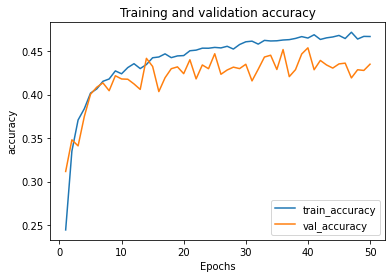

In [ ]:
plot_metric(history_constant, 'accuracy')

### Step Learning Rate Scheduling
____

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math


initial_learning_rate = 0.01


# function for the learning rate decay
def lr_step_decay(epoch, lr):
    gamma = 0.5
    step_size = 10
    return initial_learning_rate * math.pow(gamma, math.floor(epoch/step_size))


history_step_decay = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=256,
    callbacks=[LearningRateScheduler(lr_step_decay, verbose=1)],
    validation_data=(X_test, y_test)
)





Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4912 - accuracy: 0.4705 - val_loss: 1.5625 - val_accuracy: 0.4526 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4982 - accuracy: 0.4683 - val_loss: 1.5927 - val_accuracy: 0.4409 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/50
196/196 [==============================] - 1s 7ms/step - loss: 1.4883 - accuracy: 0.4714 - val_loss: 1.5628 - val_accuracy: 0.4495 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/50
196/196 [==============================] - 1s 7ms/step - loss: 1.4828 - accuracy: 0.4750 - val_loss: 1.6003 - val_accuracy: 0.4308 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/50
196/196 [==============================] - 1s 7ms/ste

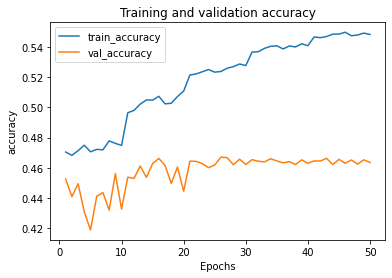

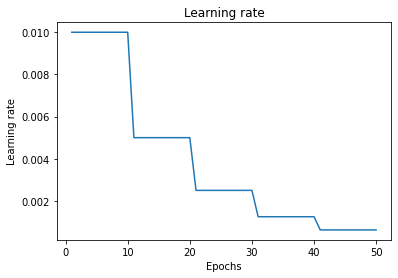

In [ ]:
plot_metric(history_step_decay,'accuracy')
plot_lr(history_step_decay)

###EXERCISE: Exponential Learning Rate Scheduling
___




Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/50
196/196 [==============================] - 2s 9ms/step - loss: 1.4663 - accuracy: 0.4792 - val_loss: 1.6022 - val_accuracy: 0.4394 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009048374180359595.
Epoch 2/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4551 - accuracy: 0.4847 - val_loss: 1.6206 - val_accuracy: 0.4417 - lr: 0.0090

Epoch 3: LearningRateScheduler setting learning rate to 0.008187307530779819.
Epoch 3/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4176 - accuracy: 0.4988 - val_loss: 1.6178 - val_accuracy: 0.4339 - lr: 0.0082

Epoch 4: LearningRateScheduler setting learning rate to 0.007408182206817179.
Epoch 4/50
196/196 [==============================] - 1s 7ms/step - loss: 1.4144 - accuracy: 0.4948 - val_loss: 1.5975 - val_accuracy: 0.4460 - lr: 0.0074

Epoch 5: LearningRateScheduler setting learning rate to 0.006703200460356393.
E

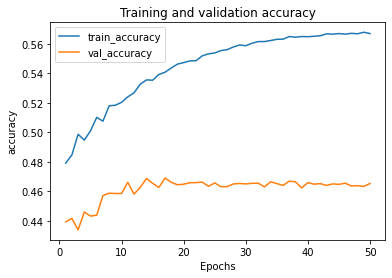

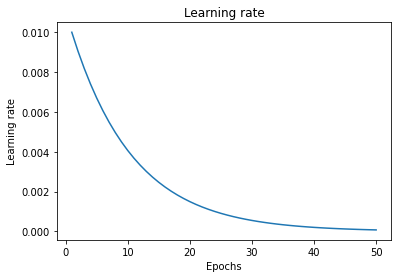

In [ ]:
initial_learning_rate = 0.01

def lr_exp_decay(epoch, lr):
  """
  TO DO: write a function for exponential weight decay

  set initial learning rate to 0.01

  For exponential weight decay:
    lr_at_epoch_t = intial_learning_rate * exp(-gamma*epoch)
  """
  gamma = 0.1
  return initial_learning_rate*(math.exp(-gamma*epoch))

history_exp_decay = model.fit(X_train,
    y_train,
    epochs=50,
    batch_size=256,
    callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)],
    validation_data=(X_test, y_test))


plot_metric(history_exp_decay,'accuracy')
plot_lr(history_exp_decay)

Comparison between all 3 learning rate schedulers

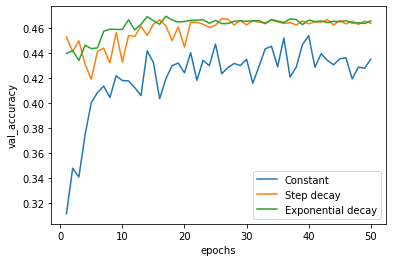

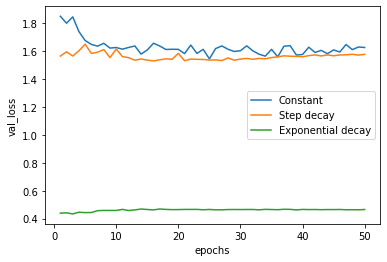

In [ ]:

import matplotlib.pyplot as plt


epochs = range(1, 51)
plt.plot(epochs,history_constant.history['val_accuracy'],label='Constant')
plt.plot(epochs,history_step_decay.history['val_accuracy'],label='Step decay')
plt.plot(epochs,history_exp_decay.history['val_accuracy'],label='Exponential decay')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('val_accuracy')
plt.show()

epochs = range(1, 51)
plt.plot(epochs,history_constant.history['val_loss'],label='Constant')
plt.plot(epochs,history_step_decay.history['val_loss'],label='Step decay')
plt.plot(epochs,history_exp_decay.history['val_accuracy'],label='Exponential decay')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.show()

## PYTORCH

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=500, shuffle=False)

class MultilayerPerceptron(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, output_size)
        #self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = F.relu(self.fc4(X))
        X = self.fc5(X)

        return F.log_softmax(X, dim=1)

model = MultilayerPerceptron().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 50


def train_model(epochs, model, scheduler,lr):
  train_losses = []
  test_losses = []
  train_accs = []
  test_accs  = []
  for i in range(epochs):
      trn_corr = 0
      tst_corr = 0
      batch_corr = 0

      for X_train, y_train in train_loader:

        X_train, y_train = X_train.to(device), y_train.to(device)

        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


      accuracy = trn_corr.item()*100 / (len(train_dataset))

      train_losses.append(loss)
      train_accs.append(accuracy)


      with torch.no_grad():

        for X_test, y_test in test_loader:

          X_test, y_test = X_test.to(device), y_test.to(device)

          y_val = model(X_test.view(500, -1))

          predicted = torch.max(y_val.data, 1)[1]
          tst_corr += (predicted == y_test).sum()

      test_accuracy = tst_corr.item()*100 / (len(test_dataset))

      val_loss = criterion(y_val,y_test)
      test_losses.append(val_loss)
      test_accs.append(test_accuracy)
      print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')
      scheduler.step()
      lr.append(scheduler.get_last_lr())

  learning_rate = lr
  epochs = range(1, len(learning_rate) + 1)
  plt.plot(epochs, learning_rate)
  plt.title('Learning rate')
  plt.xlabel('Epochs')
  plt.ylabel('Learning rate')
  plt.show()



Files already downloaded and verified


### STEP LR SCHEDULING
___

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 0 training loss:1.8946152925491333 training accuracy:22.34 val loss:1.8685691356658936 val accuracy:27.7
Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 1 training loss:1.8672866821289062 training accuracy:28.928 val loss:1.7901185750961304 val accuracy:31.44
Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 2 training loss:1.8849875926971436 training accuracy:31.42 val loss:1.7966138124465942 val accuracy:31.61
Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 3 training loss:1.675869345664978 training accuracy:31.786 val loss:1.804099202156067 val accuracy:32.22
Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 4 training loss:1.858564019203186 training accuracy:32.414 val loss:1.773681879043579 val accuracy:31.72
Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 5 training loss:1.8081620931625366 training accuracy:32.732 val loss:1.7413139343261719 val accuracy:34.55
Adjusting learning rate

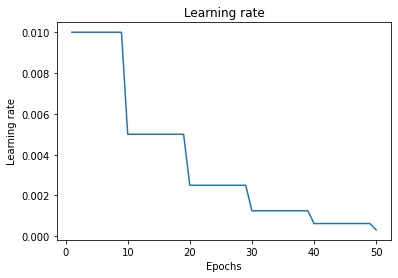

In [ ]:
model = MultilayerPerceptron().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 10 , gamma=0.5, verbose=True)

train_model(50,model, scheduler,[])

### EXPONENTIAL DECAY
___

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 0 training loss:2.3059744834899902 training accuracy:10.0 val loss:2.3003780841827393 val accuracy:10.0
Adjusting learning rate of group 0 to 9.0484e-03.
epoch: 1 training loss:2.3088974952697754 training accuracy:10.0 val loss:2.3003780841827393 val accuracy:10.0
Adjusting learning rate of group 0 to 8.1873e-03.
epoch: 2 training loss:2.308086633682251 training accuracy:10.0 val loss:2.3003780841827393 val accuracy:10.0
Adjusting learning rate of group 0 to 7.4082e-03.
epoch: 3 training loss:2.302457809448242 training accuracy:10.0 val loss:2.3003780841827393 val accuracy:10.0
Adjusting learning rate of group 0 to 6.7032e-03.
epoch: 4 training loss:2.306671380996704 training accuracy:10.0 val loss:2.3003780841827393 val accuracy:10.0
Adjusting learning rate of group 0 to 6.0653e-03.
epoch: 5 training loss:2.3061797618865967 training accuracy:10.0 val loss:2.3003780841827393 val accuracy:10.0
Adjusting learning rate of group 0 to

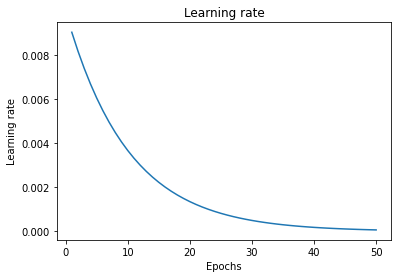

In [ ]:
"""
  TO DO: write a code snippet for exponential weight decay

  set initial learning rate to 0.01

  For exponential weight decay:
    lr_at_epoch_t = intial_learning_rate * exp(-gamma*t)
"""

import math

model2 = MultilayerPerceptron().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=math.exp(-0.1), verbose=True, last_epoch=-1)

train_model(50,model2, scheduler,[])


# WEIGHT INITIALISATION

## TENSORFLOW
___

Defining the model

In [ ]:
from tensorflow.keras import initializers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model(init):

  #defining the model...
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(1024, activation='relu', kernel_initializer= init))
  model.add(Dense(512, activation='relu',kernel_initializer=init))
  model.add(Dense(256, activation='relu',kernel_initializer=init))
  model.add(Dense(128, activation='relu',kernel_initializer=init))
  model.add(Dense(10, activation = 'softmax'))
  return model



### Using Glorot Uniform Weights
___

In [ ]:
import tensorflow as tf
initial_learning_rate = 0.01
model_1 = create_model(init = initializers.GlorotUniform())

opt = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

model_1.compile(
    optimizer=opt,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history_1 = model_1.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=256,
    validation_data=(X_test, y_test)
)


Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


196/196 [==============================] - 3s 9ms/step - loss: 3.2541 - accuracy: 0.2318 - val_loss: 1.8948 - val_accuracy: 0.2975
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 1.8236 - accuracy: 0.3359 - val_loss: 1.7451 - val_accuracy: 0.3639
Epoch 3/10
196/196 [==============================] - 1s 7ms/step - loss: 1.7533 - accuracy: 0.3660 - val_loss: 1.6782 - val_accuracy: 0.3968
Epoch 4/10
196/196 [==============================] - 1s 8ms/step - loss: 1.7039 - accuracy: 0.3868 - val_loss: 1.6568 - val_accuracy: 0.4078
Epoch 5/10
196/196 [==============================] - 2s 9ms/step - loss: 1.6734 - accuracy: 0.3943 - val_loss: 1.7047 - val_accuracy: 0.3999
Epoch 6/10
196/196 [==============================] - 1s 7ms/step - loss: 1.6435 - accuracy: 0.4064 - val_loss: 1.6324 - val_accuracy: 0.4152
Epoch 7/10
196/196 [==============================] - 1s 7ms/step - loss: 1.6322 - accuracy: 0.4098 - val_loss: 1.6289 - val_accuracy: 0.4092
Epoch 8/10
196/19

### EXERCISE: He Normal Weighta

In [ ]:
"""
TO DO:

Write the Tensorflow code for training a model with He Normal initilizer and train it for 50 epochs.
"""

initial_learning_rate = 0.01
model_2 = create_model(init = initializers.HeNormal())

opt = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

model_2.compile(
    optimizer=opt,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history_2 = model_2.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_test, y_test)
)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


196/196 [==============================] - 3s 9ms/step - loss: 4.0770 - accuracy: 0.2465 - val_loss: 1.8546 - val_accuracy: 0.3244
Epoch 2/50
196/196 [==============================] - 1s 7ms/step - loss: 1.8144 - accuracy: 0.3400 - val_loss: 1.7931 - val_accuracy: 0.3539
Epoch 3/50
196/196 [==============================] - 1s 7ms/step - loss: 1.7504 - accuracy: 0.3689 - val_loss: 1.7171 - val_accuracy: 0.3826
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7018 - accuracy: 0.3903 - val_loss: 1.7617 - val_accuracy: 0.3669
Epoch 5/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6777 - accuracy: 0.3965 - val_loss: 1.6889 - val_accuracy: 0.3933
Epoch 6/50
196/196 [==============================] - 2s 9ms/step - loss: 1.6628 - accuracy: 0.4031 - val_loss: 1.7094 - val_accuracy: 0.3864
Epoch 7/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6375 - accuracy: 0.4143 - val_loss: 1.6451 - val_accuracy: 0.4219
Epoch 8/50
196/19

## PYTORCH

Loading the dataset and libraries

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=500, shuffle=False)

Files already downloaded and verified


Defining the model

In [ ]:
class MultilayerPerceptron(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, output_size)


    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = F.relu(self.fc4(X))
        X = self.fc5(X)

        return F.log_softmax(X, dim=1)

Train function

In [ ]:

def train_model(epochs, model):
  train_losses = []
  test_losses = []
  train_accs = []
  test_accs  = []
  for i in range(epochs):
      trn_corr = 0
      tst_corr = 0
      batch_corr = 0

      for X_train, y_train in train_loader:

        X_train, y_train = X_train.to(device), y_train.to(device)

        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


      accuracy = trn_corr.item()*100 / (len(train_dataset))

      train_losses.append(loss)
      train_accs.append(accuracy)


      with torch.no_grad():

        for X_test, y_test in test_loader:

          X_test, y_test = X_test.to(device), y_test.to(device)

          y_val = model(X_test.view(500, -1))

          predicted = torch.max(y_val.data, 1)[1]
          tst_corr += (predicted == y_test).sum()

      test_accuracy = tst_corr.item()*100 / (len(test_dataset))

      val_loss = criterion(y_val,y_test)
      test_losses.append(val_loss)
      test_accs.append(test_accuracy)
      print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')


###Using Glorot Uniform weights

In [ ]:

def initialize_weights(m):
  if isinstance(m, nn.Linear):
    nn.init.xavier_uniform_(m.weight.data, gain=1.0)


model_1 = MultilayerPerceptron().to(device)
model_1.apply(initialize_weights)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_model(10, model_1)

epoch: 0 training loss:2.3660361766815186 training accuracy:10.044 val loss:2.392580270767212 val accuracy:9.96
epoch: 1 training loss:2.380840301513672 training accuracy:10.044 val loss:2.392580270767212 val accuracy:9.96
epoch: 2 training loss:2.370389938354492 training accuracy:10.044 val loss:2.392580270767212 val accuracy:9.96
epoch: 3 training loss:2.3243868350982666 training accuracy:10.044 val loss:2.392580270767212 val accuracy:9.96
epoch: 4 training loss:2.3493728637695312 training accuracy:10.044 val loss:2.392580270767212 val accuracy:9.96
epoch: 5 training loss:2.405158758163452 training accuracy:10.044 val loss:2.392580270767212 val accuracy:9.96
epoch: 6 training loss:2.4252846240997314 training accuracy:10.044 val loss:2.392580270767212 val accuracy:9.96
epoch: 7 training loss:2.4161462783813477 training accuracy:10.044 val loss:2.392580270767212 val accuracy:9.96
epoch: 8 training loss:2.3807272911071777 training accuracy:10.044 val loss:2.392580270767212 val accuracy:

### EXERCISE: He Normal Weight Initialisation

In [ ]:
"""
Write the Pytorch code for training a model with He Normal initilizer and train it for 50 epochs.
"""


def initialize_weights(m):
  if isinstance(m, nn.Linear):
    nn.init.kaiming_normal_(m.weight.data)

model_2 = MultilayerPerceptron().to(device)
model_2.apply(initialize_weights)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_model(50, model_2)


epoch: 0 training loss:2.4104955196380615 training accuracy:9.628 val loss:2.5128495693206787 val accuracy:9.35
epoch: 1 training loss:2.481901168823242 training accuracy:9.628 val loss:2.5128495693206787 val accuracy:9.35
epoch: 2 training loss:2.507664918899536 training accuracy:9.628 val loss:2.5128495693206787 val accuracy:9.35
epoch: 3 training loss:2.5494813919067383 training accuracy:9.628 val loss:2.5128495693206787 val accuracy:9.35
epoch: 4 training loss:2.375648021697998 training accuracy:9.628 val loss:2.5128495693206787 val accuracy:9.35
epoch: 5 training loss:2.509303331375122 training accuracy:9.628 val loss:2.5128495693206787 val accuracy:9.35
epoch: 6 training loss:2.554966688156128 training accuracy:9.628 val loss:2.5128495693206787 val accuracy:9.35
epoch: 7 training loss:2.4305078983306885 training accuracy:9.628 val loss:2.5128495693206787 val accuracy:9.35
epoch: 8 training loss:2.4616713523864746 training accuracy:9.628 val loss:2.5128495693206787 val accuracy:9.